In [1]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import geopy as gp
from geopy.distance import great_circle
import scipy.spatial
import matplotlib.pyplot as plt



In [ ]:
zillowpd = pd.read_csv('../raw_data/Neighborhood_MedianValuePerSqft_AllHomes.csv') 


In [ ]:
zillowpdsd = zillowpd[zillowpd['CountyName'] == 'San Diego'] # remove all counties not san diego
# remove uneccessary columns
zillowpdsd = zillowpdsd.drop('RegionID', 1)
zillowpdsd = zillowpdsd.drop('State', 1)
zillowpdsd = zillowpdsd.drop('SizeRank', 1)
# remove all but latest rent info
zillowpdsd2 = zillowpdsd[['RegionName', 'City','Metro','CountyName','2017-03']]
zillowpdsd2

In [ ]:
zillowpdsd.to_csv('../clean_data/clean_full_pricepersqft.csv')
zillowpdsd2.to_csv('../clean_data/clean_latest_pricepersqft.csv')

In [42]:
randomPoints1 = pd.read_csv('../clean_data/randomPoints.csv') 
open_pot = pd.read_csv('../clean_data/cleaned_get_it_done_open_potholes.csv')


In [43]:
randResults = np.zeros((len(randomPoints1),len(open_pot)))

In [44]:
for i in randomPoints1.index:
    randomPoint = randomPoints1.iloc[i]
    for j in open_pot.index:
        open_pott = open_pot.iloc[j]
        randResults[i][j] = great_circle((randomPoint['Y'], randomPoint['X']), (open_pott['lat'], open_pott['long'])).meters
np.save('../clean_data/randDistances.npy',busResults)


In [45]:
randResults

array([[ 21294.18137354,  32455.46854985,  19346.96391187, ...,
         11223.40486153,   4243.650653  ,             nan],
       [ 26758.55166862,  17773.62264483,  30353.9422605 , ...,
         38644.98415844,  44216.64858176,             nan],
       [ 19296.32118276,  11328.90529847,  23086.43584364, ...,
         31269.88935603,  36747.12363651,             nan],
       ..., 
       [ 14985.92497456,  25946.68759569,  14482.13546138, ...,
          5142.64485801,   4415.40279766,             nan],
       [ 15316.04657951,  17580.02277632,  22240.26965402, ...,
         12270.31128578,  21779.5897994 ,             nan],
       [ 12680.86413256,  13145.31330652,  20398.13083886, ...,
         13633.39893837,  23011.1173002 ,             nan]])

In [11]:
closedPotholes = pd.read_csv('../clean_data/complete_closed.csv') 
closedPotholes = closedPotholes[['lat','long']]
closedPotholes.shape

(11905, 2)

In [12]:
openPotholes = pd.read_csv('../clean_data/FINAL_open_pothole_count.csv') 
openPotholes = openPotholes[['lat','long']]
openPotholes.shape

(2573, 2)

In [15]:
allPotholes = pd.concat([closedPotholes, openPotholes])
bus_stops = pd.read_csv('../clean_data/clean_bus_stops.csv')
bus_stops = bus_stops[~np.isnan(bus_stops['LONGITUDE'])]
bus_stops = bus_stops[bus_stops['LONGITUDE'] != 0]

In [17]:
open_pot_coordinates = np.asarray(allPotholes[['lat','long']])
bus_stops_coordinates = np.asarray(bus_stops[['LATITUDE','LONGITUDE']])


In [44]:
dist_bus_data = scipy.spatial.distance.cdist(open_pot_coordinates,bus_stops_coordinates)
min_dist_indices = np.zeros(dist_bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])

for i in range(0,dist_bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _    
    if dist_bus_data[i][_] > 20:
        print('WTF',i,':',dist_bus_data[i][_])


WTF 4793 : 30.2332189564
WTF 4840 : 120.676208029
WTF 4936 : 30.8632582989
WTF 5121 : 27.4985194657
WTF 7267 : 120.676208029
WTF 8258 : 120.676208029
WTF 9678 : 31.5457862561
WTF 9696 : 31.4312596027
WTF 9775 : 32.1084048696
WTF 9867 : 28.2401390377
WTF 9889 : 31.0495755468
WTF 9919 : 37.0562810338
WTF 9932 : 275.697472971
WTF 10060 : 45.7198603927
WTF 10072 : 128.898409146
WTF 10079 : 32.3937811226
WTF 10090 : 29.1769585769
WTF 10191 : 28.7539948343
WTF 10228 : 120.676208029
WTF 14028 : 120.676208029
WTF 14264 : 120.676208029
WTF 14357 : 120.676208029


In [45]:
min_dists = pd.Series(min_dists).dropna()

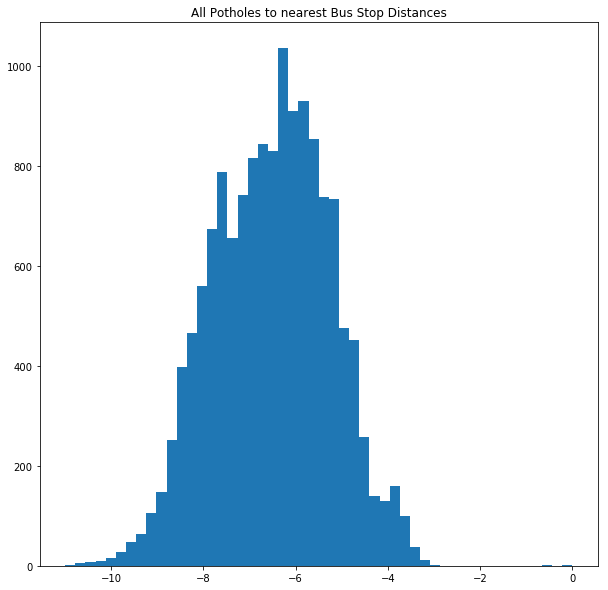

Mean: 0.1262216002018572


In [49]:
#All Potholes to nearest Bus Stop Distances
plt.close()
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50, range=[-11,0])
plt.title('All Potholes to nearest Bus Stop Distances')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

WTF 4793 : 30.934840055
WTF 4840 : 121.323575615
WTF 4936 : 31.6335567375
WTF 5121 : 28.314177683
WTF 7267 : 121.323575615
WTF 8258 : 121.323575615
WTF 9678 : 32.2460765864
WTF 9696 : 32.2220693832
WTF 9775 : 32.8520697647
WTF 9867 : 28.9403688386
WTF 9889 : 31.8344145114
WTF 9919 : 37.7767859747
WTF 9932 : 276.367786277
WTF 10060 : 46.445109483
WTF 10072 : 129.68335958
WTF 10079 : 33.1200213141
WTF 10090 : 29.9935702121
WTF 10103 : 20.395534892
WTF 10191 : 29.4525145538
WTF 10228 : 121.323575615
WTF 14028 : 121.323575615
WTF 14264 : 121.323575615
WTF 14357 : 121.323575615


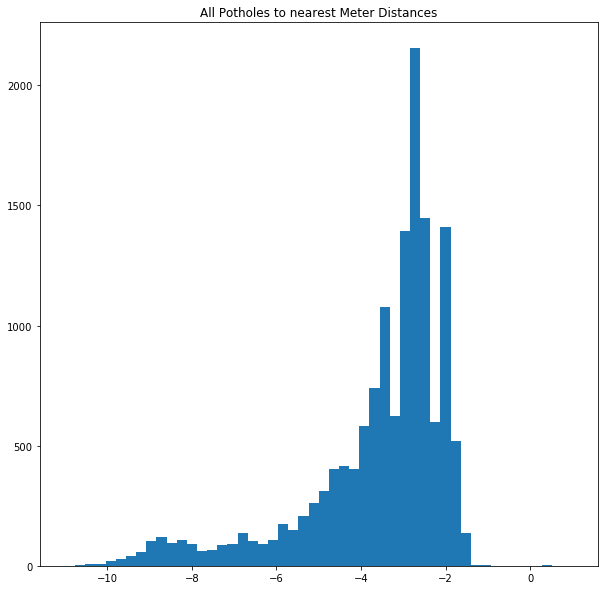

Mean: 0.18172019100348896


In [50]:
# meter distances
meter_data = pd.read_csv('../raw_data/raw_parking_meter_location.csv')
meter_data = meter_data[~np.isnan(meter_data['longitude'])]
meter_data = meter_data[meter_data['longitude'] != 0]
meter_data_coordinates = np.asarray(meter_data[['latitude','longitude']])

dist_meter_data = scipy.spatial.distance.cdist(open_pot_coordinates,meter_data_coordinates)
min_dist_indices = np.zeros(dist_meter_data.shape[0])
min_dists = np.zeros(dist_meter_data.shape[0])
for i in range(0,dist_meter_data.shape[0]):
    _ = np.argmin(dist_meter_data[i])
    min_dists[i] = dist_meter_data[i][_]
    min_dist_indices[i] = _    
    if dist_meter_data[i][_] > 20:
        print('WTF',i,':',dist_meter_data[i][_])
min_dists = pd.Series(min_dists).dropna()
plt.close()
plt.figure(figsize=(10,10))
plt.hist(np.log(min_dists), 50, range=[-11,1])
plt.title('All Potholes to nearest Meter Distances')
plt.show()
plt.close()
print('Mean:',np.mean(min_dists))

In [5]:
bus_stops = pd.read_csv('../clean_data/clean_bus_stops.csv')

potholes = pd.read_csv('../clean_data/Combined_Closed_Neighb.csv')



In [4]:
bus_stops = bus_stops[~np.isnan(bus_stops['LONGITUDE'])]
bus_stops = bus_stops[bus_stops['LONGITUDE'] != 0]
closed_pot_coordinates = np.asarray(potholes[['lat','long']])
bus_stops_coordinates = np.asarray(bus_stops[['LATITUDE','LONGITUDE']])

In [7]:
dist_bus_data = scipy.spatial.distance.cdist(closed_pot_coordinates,bus_stops_coordinates)
min_dist_indices = np.zeros(dist_bus_data.shape[0])
min_dists = np.zeros(dist_bus_data.shape[0])

for i in range(0,dist_bus_data.shape[0]):
    _ = np.argmin(dist_bus_data[i])
    min_dists[i] = dist_bus_data[i][_]
    min_dist_indices[i] = _    
    if dist_bus_data[i][_] > 20:
        print('WTF',i,':',dist_bus_data[i][_])

min_distances = pd.DataFrame({'min_dists': min_dists})
potholes =  potholes.join(min_distances)
potholes.axes

WTF 35 : 46.5011492639
WTF 111 : 275.697472971
WTF 138 : 32.3937811226
WTF 259 : 128.898409146
WTF 276 : 120.676208029
WTF 281 : 45.7198603927
WTF 293 : 28.7539948343
WTF 359 : 122.408660892
WTF 378 : 31.0495755468
WTF 399 : 36.0261451571
WTF 477 : 28.2401390377
WTF 539 : 42.461849961
WTF 557 : 36.6285104061
WTF 604 : 120.676208029
WTF 803 : 32.1084048696
WTF 806 : 31.4312596027
WTF 815 : 37.0562810338
WTF 838 : 38.3907070854
WTF 1134 : 31.1565812022
WTF 3649 : 40.4248707326
WTF 3923 : 120.676208029
WTF 4588 : 30.8632582989
WTF 5520 : 120.676208029
WTF 5986 : 120.676208029
WTF 7154 : 27.4985194657
WTF 7930 : 30.2332189564
WTF 8101 : 120.676208029
WTF 9190 : 120.676208029
WTF 10568 : 31.5457862561
WTF 13514 : 29.1769585769


[RangeIndex(start=0, stop=16527, step=1),
 Index(['Unnamed: 0', 'index', 'level_0', 'Unnamed: 0.1', 'Neighborhood',
        'Unnamed: 0.1.1.1', 'closed', 'closed_date', 'coordinates',
        'duplicate_verified', 'lat', 'long', 'mobile_web_status', 'open',
        'override_duplicate', 'requested_datetime', 'sap_problem_type',
        'service_name', 'status_description', 'Duration to Close (Hrs)',
        'closed_changed_date', 'Neighborhood_Val', 'min_dists'],
       dtype='object')]

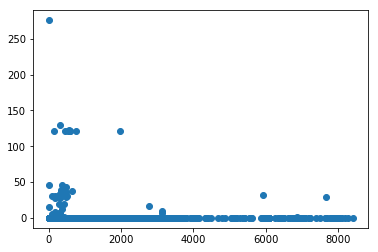

In [11]:
plt.scatter(potholes['Duration to Close (Hrs)'], potholes['min_dists'])